<a href="https://colab.research.google.com/github/TatyanaFilimonova/CM/blob/main/Module5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

**Дерева рішень** - це інструмент машинного навчання, який використовує деревоподібну структуру для прийняття рішень. Вони розбивають дані на менші підмножини на основі значень ознак, допоки не буде знайдено рішення (прогноз).

### Examples

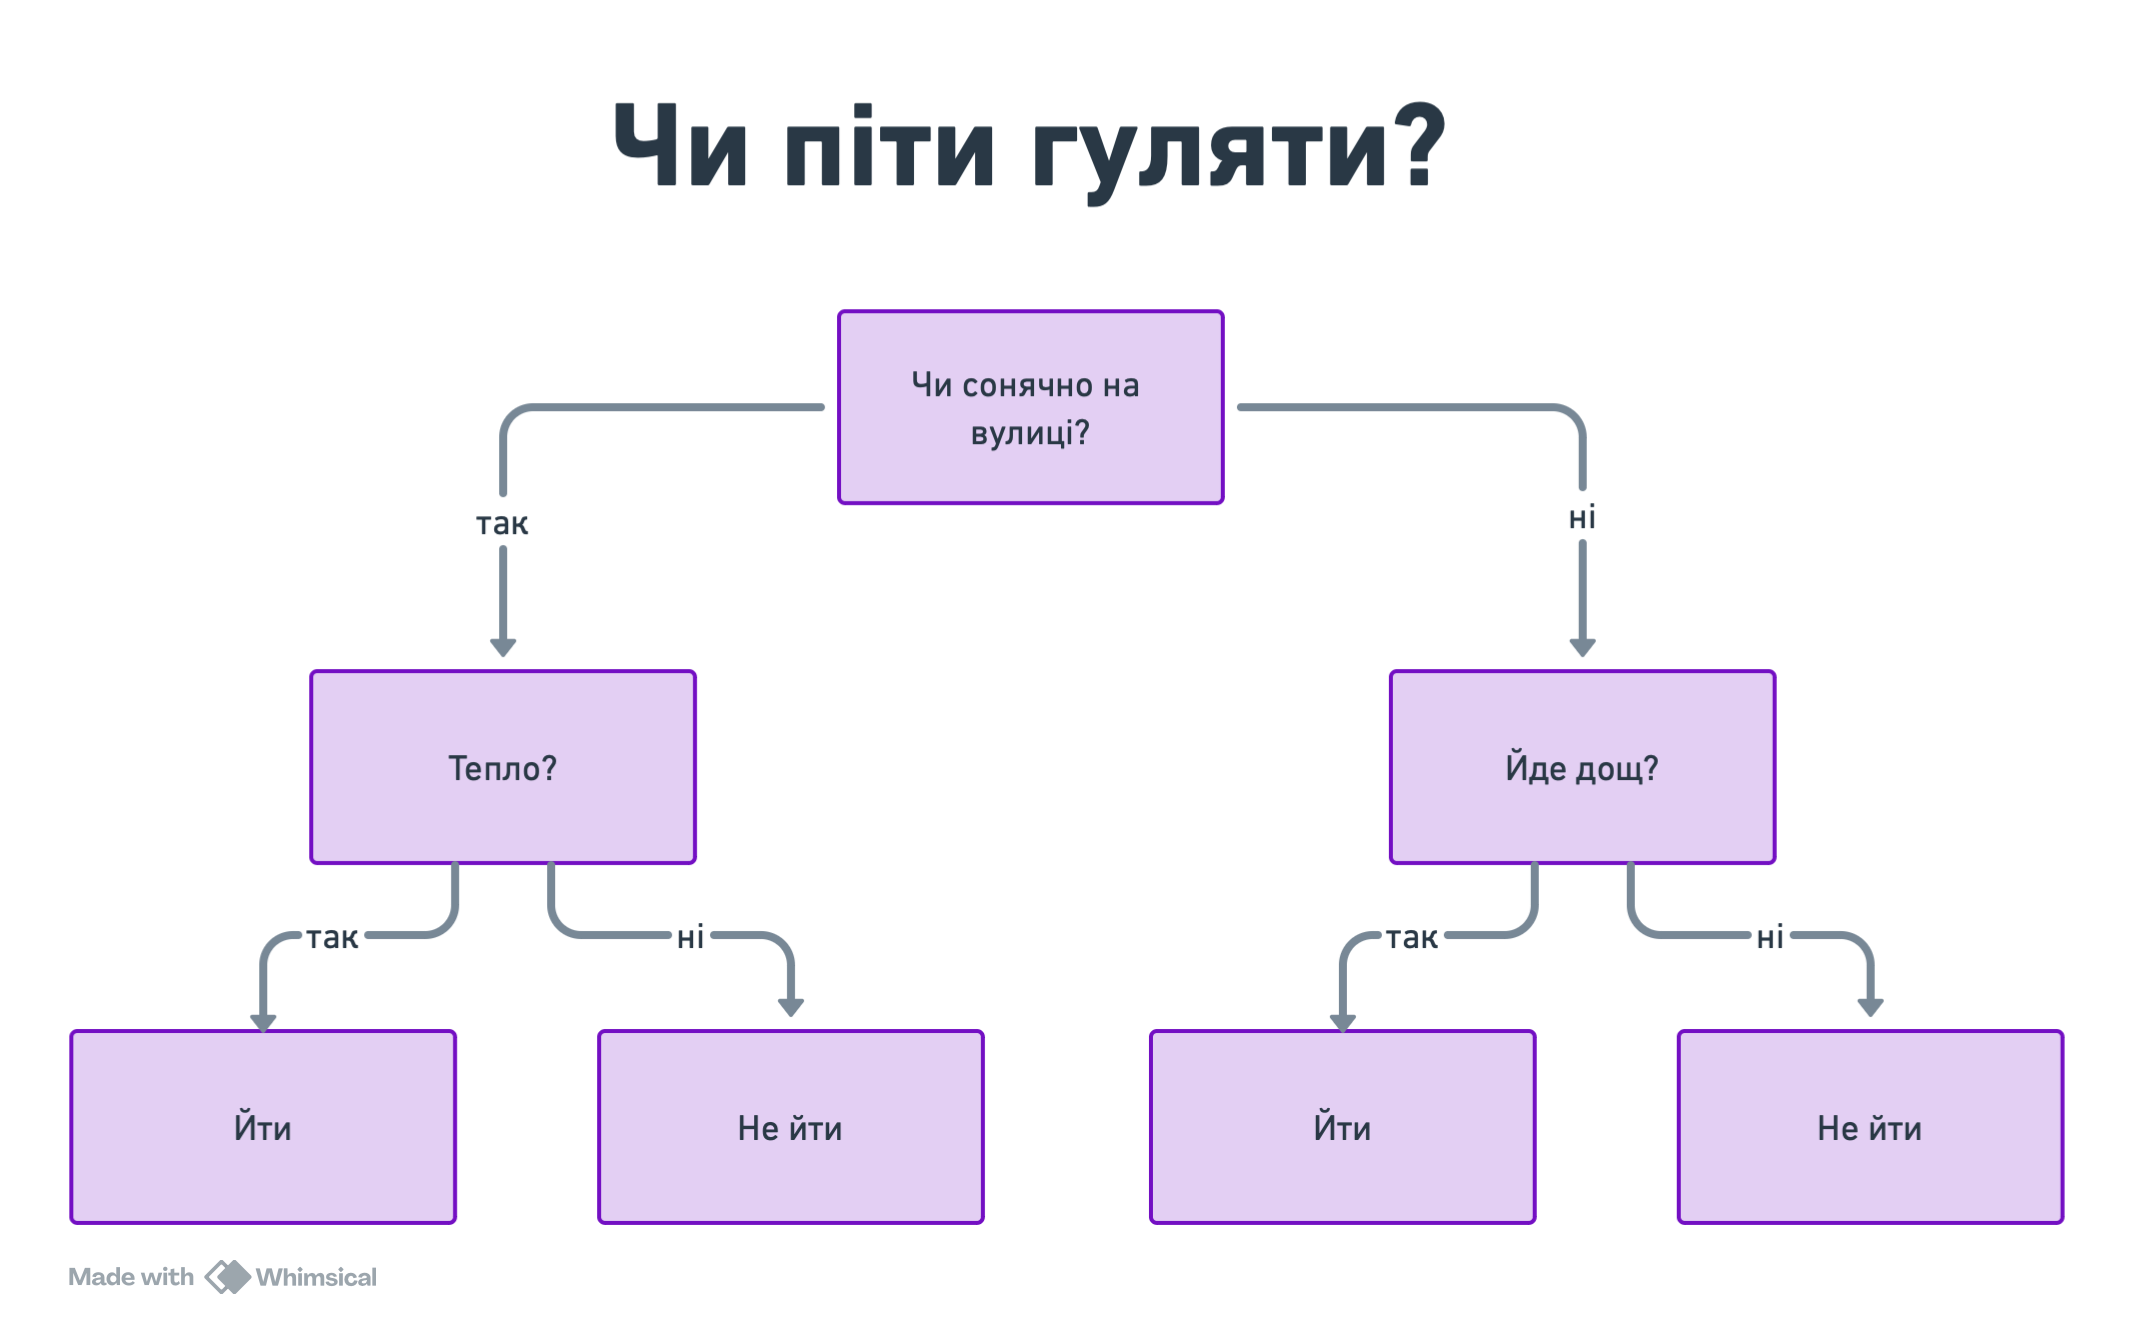

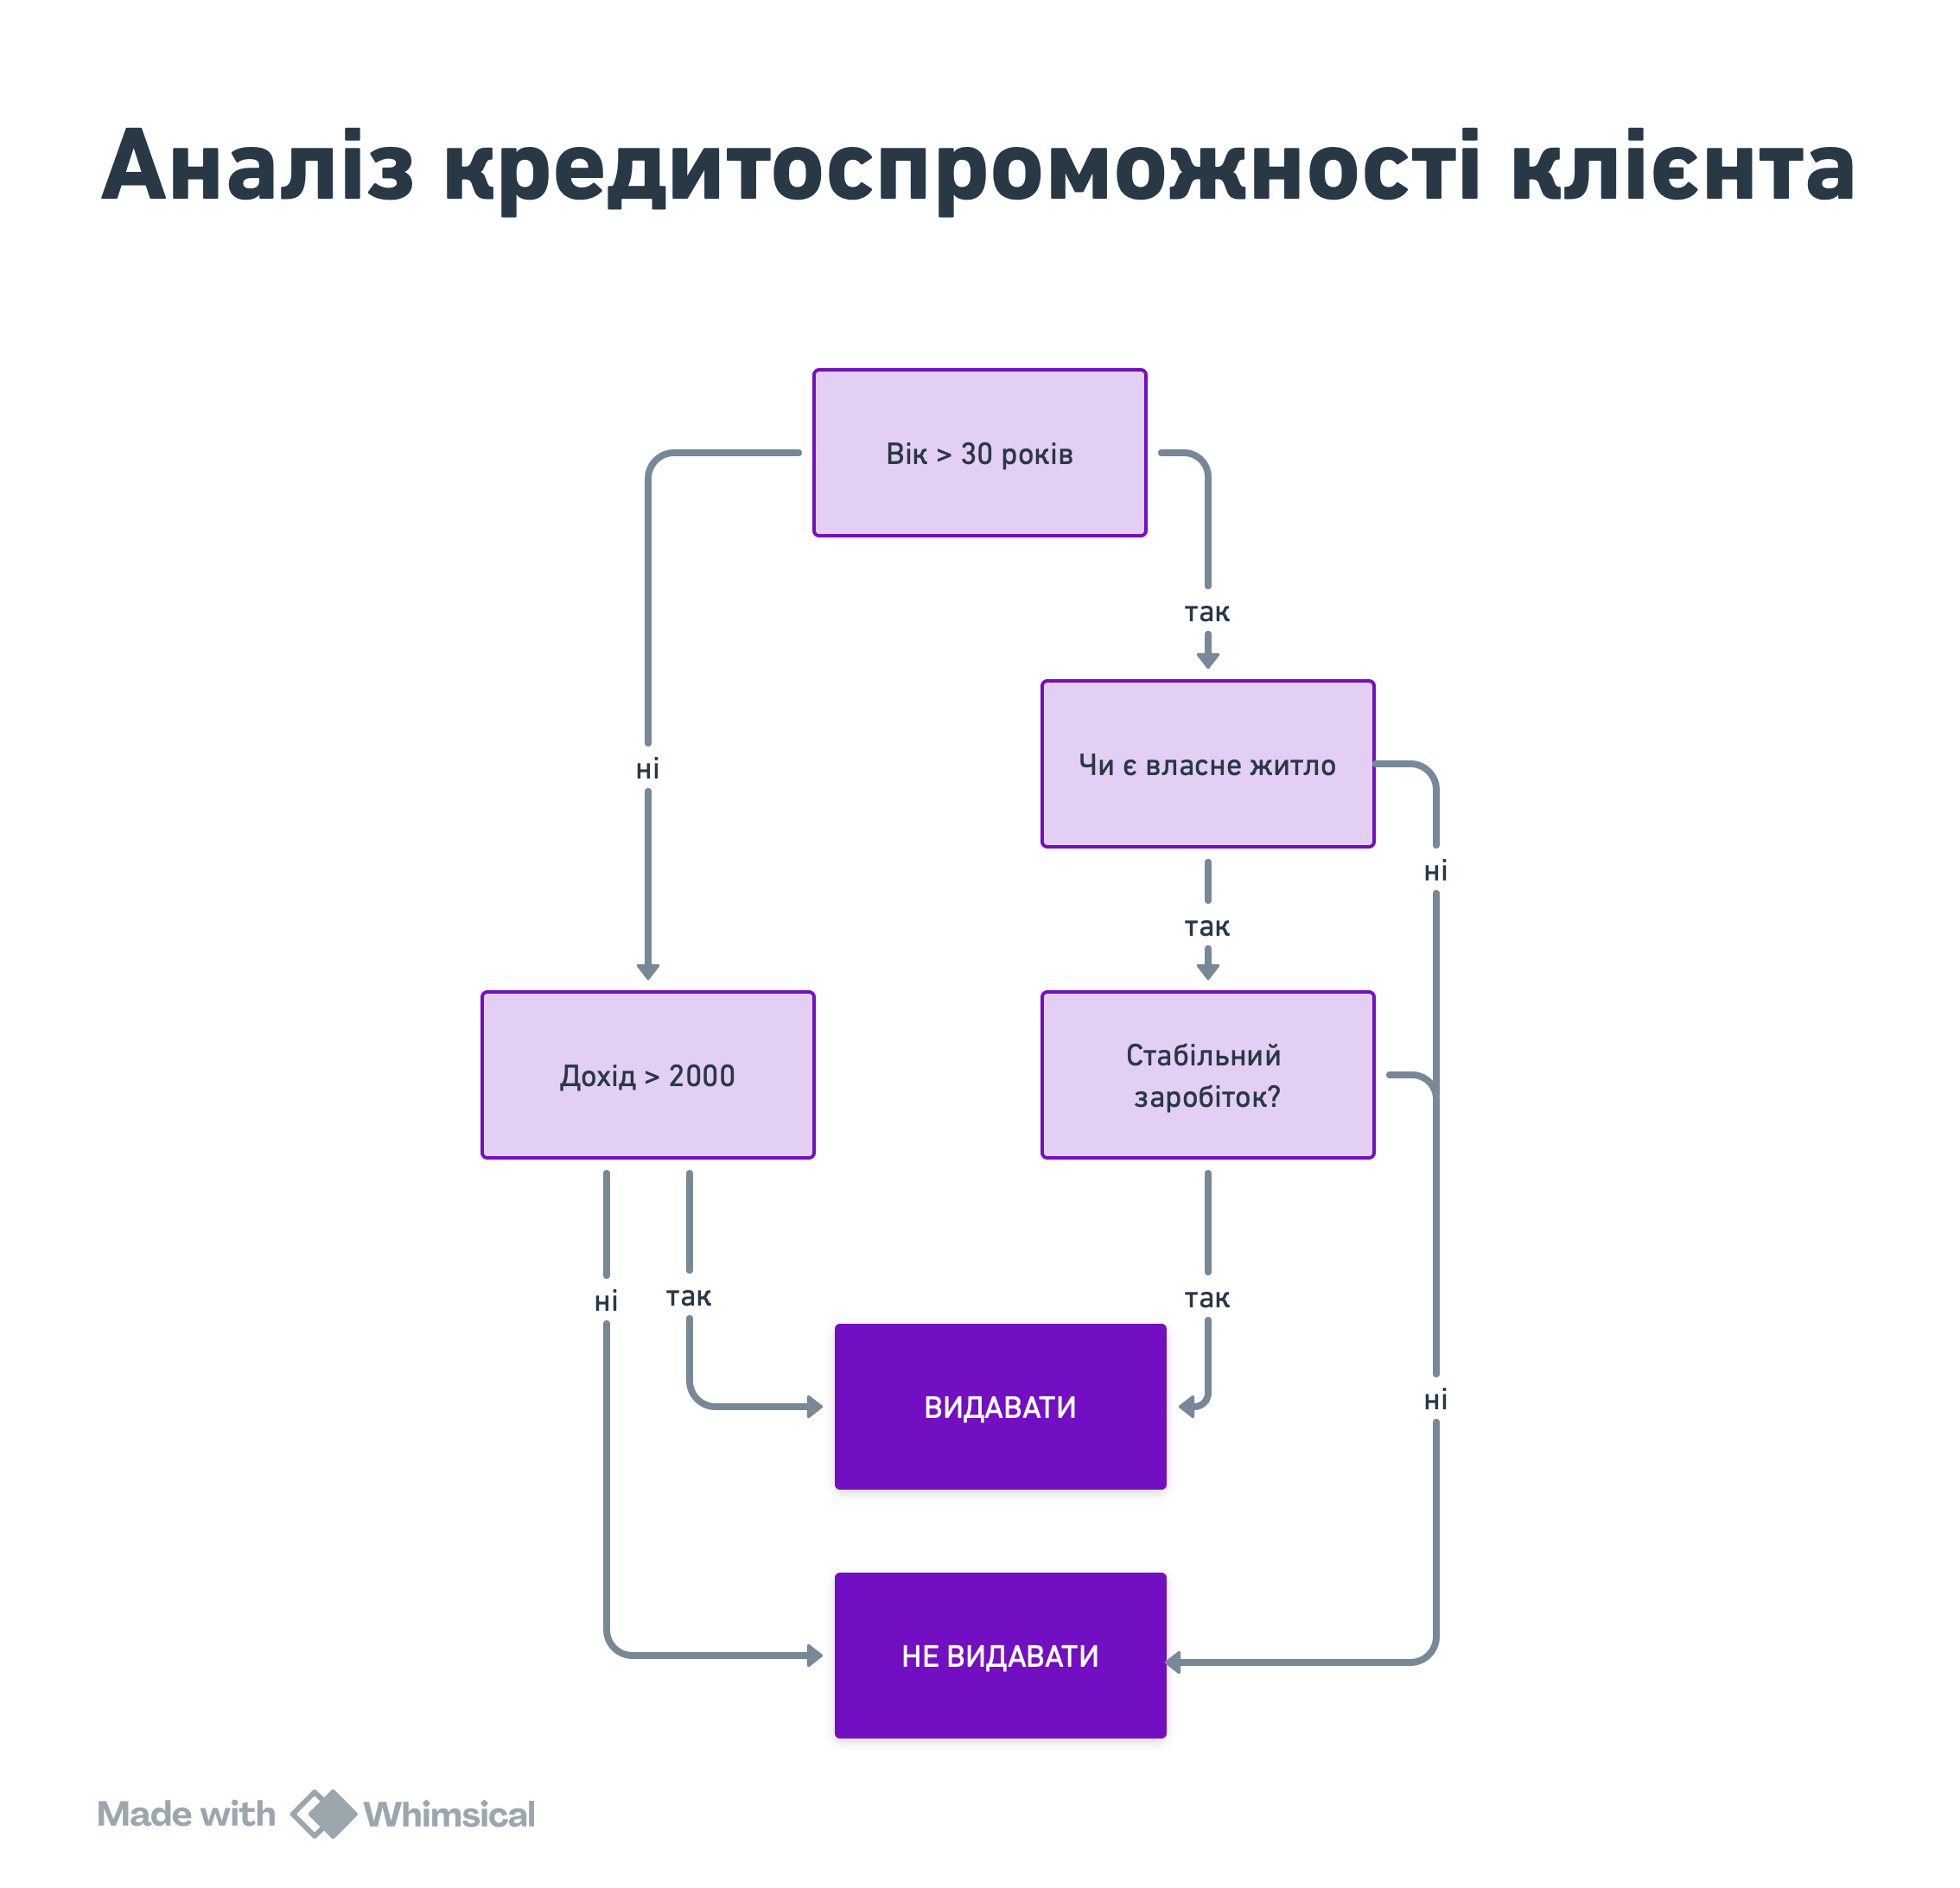

**Типи дерев рішень:**
- *Класифікація*: Використовуються для прогнозування категоріальної змінної (класу). Приклад: Класифікація електронних листів на спам та не спам.
- *Регресія*: Використовуються для прогнозування числової змінної. Приклад: Прогнозування ціни акцій на наступний день.

**Переваги дерев рішень:**
- Простота інтерпретації: Дерева рішень легко візуалізувати та зрозуміти, що робить їх придатними для пояснення рішень нетехнічним фахівцям.
- Робота з різними типами даних: Дерева рішень можуть працювати з числовими, категоріальними та змішаними даними.
- **Не вимагають масштабування даних**: На відміну від деяких інших алгоритмів машинного навчання, дерева рішень не вимагають масштабування даних перед навчанням.

**Недоліки дерев рішень:**
- Схильність до перенавчання: Дерева рішень можуть стати дуже складними та "запам'ятати" навчальні дані, що призведе до поганої здатності до узагальнення на нові дані.
- Нестабільність: Невеликі зміни в даних можуть призвести до значних змін у структурі дерева рішень.

**Приклади використання:**
- **Класифікація:** Визначення спаму, діагностика захворювань, розпізнавання образів, кредитний скоринг.
- **Регресія:** Прогнозування цін на нерухомість, прогнозування продажів, прогнозування вартості медичних послуг.

## **Основні поняття**

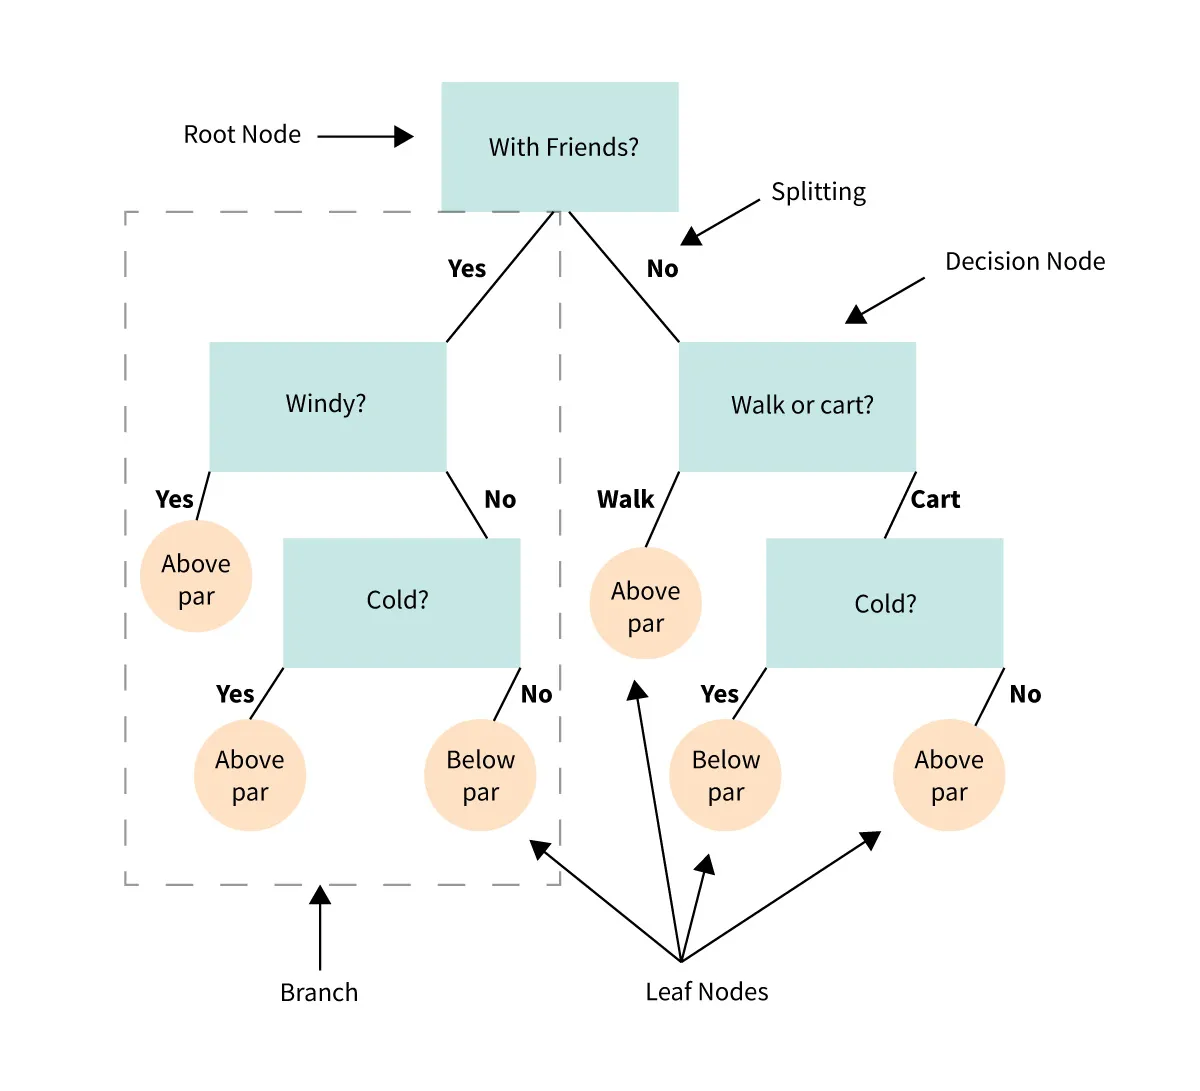

- **Кореневий вузол**:
  - Перший вузол у дереві.
  - Містить умову для розбиття даних на підмножини.

- **Внутрішній вузол:**
  - Вузол, який не є кореневим або листовим.
  - Також містить умову для розбиття даних.

- **Листовий вузол (лист):**
  - Кінцевий вузол, який не має дочірніх вузлів.
  - Містить прогноз (клас або числове значення).

- **Гілка:**
  - Шлях від кореневого вузла до листового вузла.
  - Представляє послідовність рішень, прийнятих деревом.

- **Глибина дерева:**
  - Максимальна кількість вузлів від кореневого до будь-якого листового вузла.
  - Впливає на складність та здатність до узагальнення.

## Iris example

**Гіперпараметри**:
- *criterion*: Критерій розбиття ('gini', 'entropy').
- *max_depth*: Максимальна глибина дерева.
- *min_samples_split*: Мінімальна кількість прикладів, необхідна для розбиття вузла.
- *min_samples_leaf*: Мінімальна кількість прикладів у листовому вузлі.

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((120, 4), (30, 4))

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1)

In [ ]:
tree_model.fit(X_train, y_train)

print(tree_model.score(X_train, y_train))
print(tree_model.score(X_test, y_test))

1.0
0.9666666666666667


In [ ]:
tree_model.feature_importances_

array([0.04181788, 0.06489447, 0.01875391, 0.87453375])

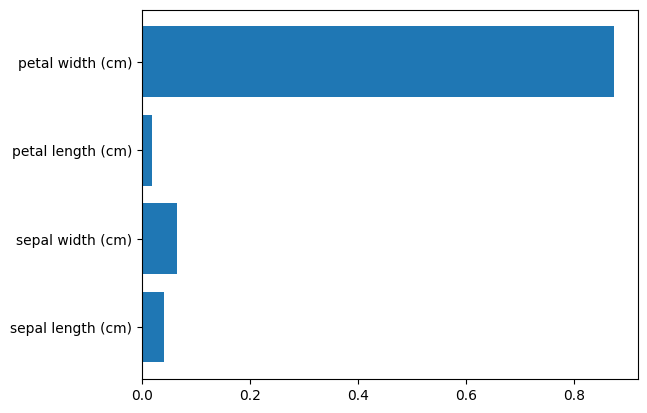

In [ ]:
plt.barh(range(len(tree_model.feature_importances_)), tree_model.feature_importances_)
plt.yticks(range(len(iris.feature_names)), iris.feature_names)
plt.show()

### Візуалізація дерева рішень

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

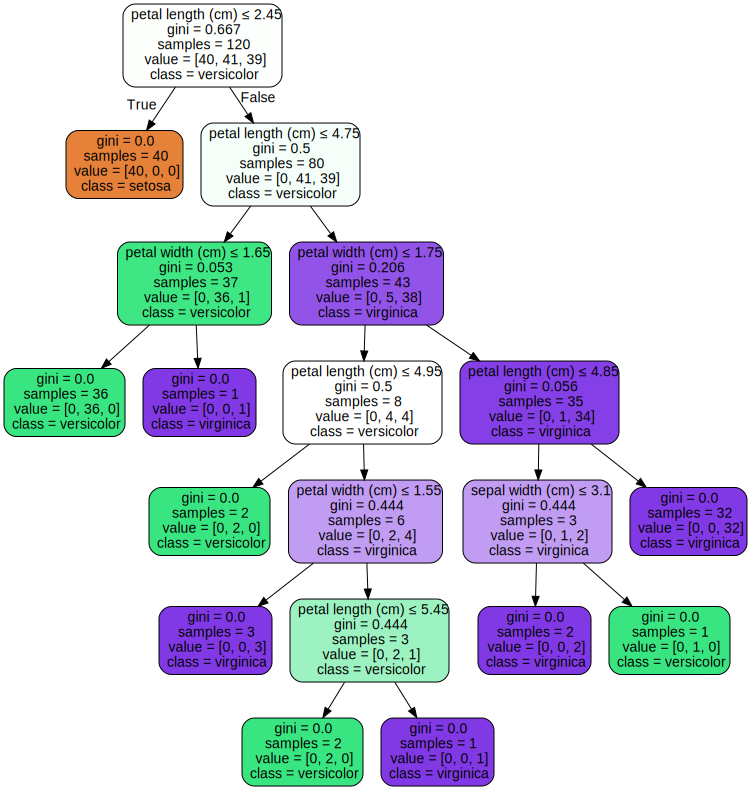

In [ ]:
dot_data = export_graphviz(
    tree_model, out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True, proportion=False, filled=True, special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("iris_tree")
graph

In [ ]:
(1.9 + 3) / 2

2.45

In [ ]:
X_train[:, 2].sort()
X_train[:, 2]

array([1. , 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.9,
       1.9, 3. , 3.3, 3.3, 3.5, 3.5, 3.7, 3.8, 3.9, 4. , 4. , 4. , 4. ,
       4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4,
       4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.8,
       4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 5. , 5. , 5. , 5. , 5.1, 5.1, 5.1,
       5.1, 5.1, 5.1, 5.2, 5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6,
       5.6, 5.6, 5.7, 5.7, 5.7, 5.8, 5.9, 6. , 6. , 6.1, 6.1, 6.1, 6.3,
       6.6, 6.7, 6.7])

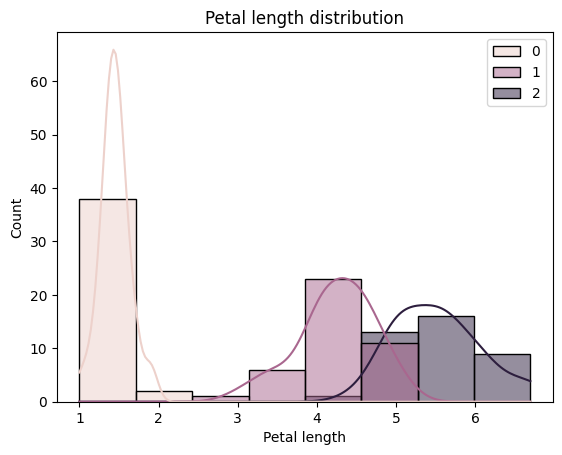

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x=X_train[:, 2], hue=y_train, kde=True)
plt.title("Petal length distribution")
plt.xlabel("Petal length")
plt.show()

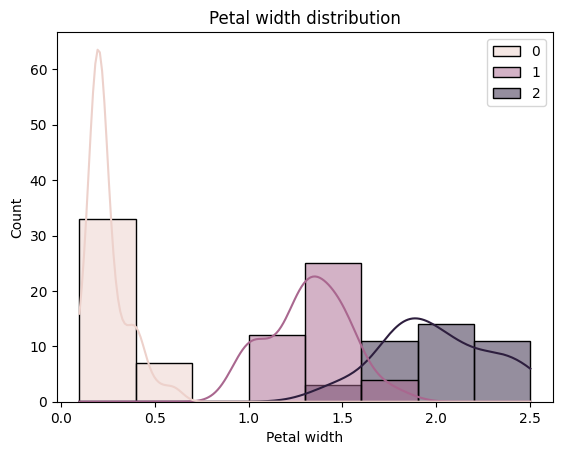

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x=X_train[:, 3], hue=y_train, kde=True)
plt.title("Petal width distribution")
plt.xlabel("Petal width")
plt.show()

## Коефіцієнт Джині

**Коефіцієнт Джині (Gini Impurity)** - це міра невпорядкованості даних в вузлі дерева рішень. Вона вимірює, наскільки часто випадково вибраний елемент з набору буде неправильно віднесений до свого класу, якщо вибрати два елементи з набору з різними мітками класу.

Щоб розрахувати коефіцієнт Джині для певного вузла дерева, необхідно виконати такі дії:

- Розбити дані вузла на дві групи відносно значення певної ознаки (атрибута).
- Розрахувати коефіцієнт Джині для кожної з двох отриманих груп, тобто для кожного з листків.
- Взяти зважену суму коефіцієнтів Джині двох груп, де вагою є кількість прикладів у кожній з них відносно загальної кількості прикладів у вузлі.
- Отриманий результат - це значення коефіцієнта Джині для даного вузла дерева.

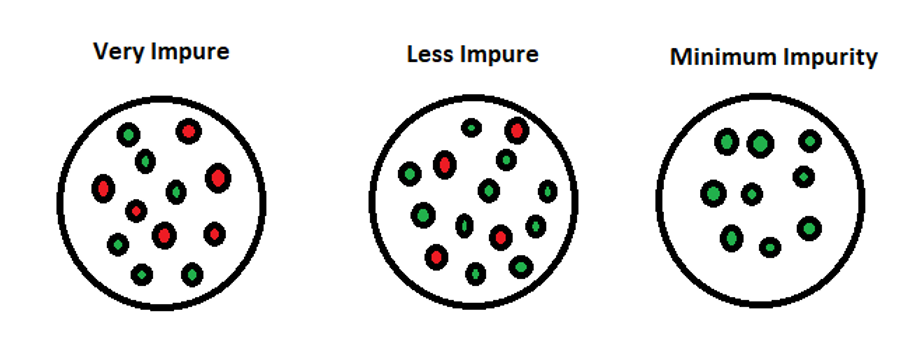

In [ ]:
1 - (10/14)**2 - (4/14)**2

0.40816326530612246

In [ ]:
1 - (6/12)**2 - (6/12)**2

0.5

## Tree training

ID3 (Iterative Dichotomiser 3) - це жадібний алгоритм побудови дерева рішень, який використовує інформаційний приріст (або коефіцієнт Джині) для вибору найкращого атрибута для розбиття на кожному кроці.

**Кроки алгоритму:**
1. Вибір найкращого атрибута:
 - Для кожного атрибута розраховується інформаційний приріст (або коефіцієнт Джині).
 - Атрибут з найвищим інформаційним приростом (або найнижчим коефіцієнтом Джині) вибирається як найкращий.
2. Створення вузла: Створюється новий вузол у дереві, який відповідає обраному атрибуту.
3. Рекурсивне повторення: Для кожного можливого значення обраного атрибута створюється нова гілка, і кроки 1-2 повторюються для підмножини даних, яка потрапила в цю гілку.

**Критерії зупинки:**
- Всі приклади в вузлі належать до одного класу: У цьому випадку вузол стає листовим вузлом, і йому присвоюється мітка цього класу.
- Досягнуто максимальної глибини дерева: Цей параметр запобігає надмірній складності дерева та перенавчанню.
- Кількість прикладів у вузлі менше заданого порогу: Цей параметр також допомагає запобігти перенавчанню, обмежуючи розбиття занадто малих підмножин даних.

## Decision Boundary

In [ ]:
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay


feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

tree = DecisionTreeClassifier().fit(iris.data[:, :2], iris.target)
tree.score(iris.data[:, :2], iris.target)

0.9266666666666666

In [ ]:
dot_data = export_graphviz(
    tree, out_file=None,
    feature_names=iris.feature_names[:2],
    class_names=iris.target_names,
    rounded=True, proportion=False, filled=True, special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("iris_tree")
graph

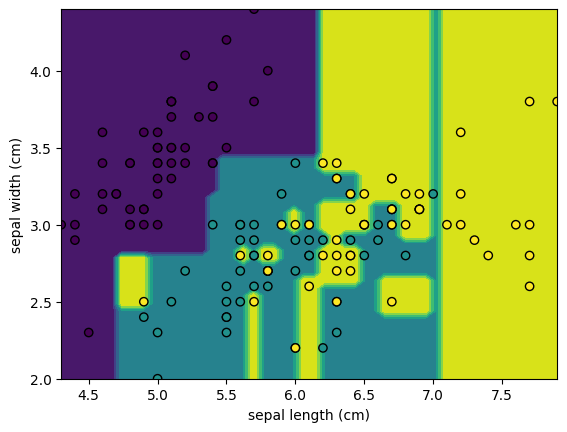

In [ ]:
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()
display.ax_.scatter(
    iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black"
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [ ]:
tree.feature_importances_

array([0.66423439, 0.33576561])

# Random forest

**Проблема** - перенавчання, коли дерево рішень стає занадто складним і "запам'ятовує" навчальні дані, що призводить до поганої здатності до узагальнення.

**Random Forest** - це ансамблевий метод, який допомагає вирішити цю проблему, об'єднуючи кілька дерев рішень.

**Основні ідеї Random Forest:**
- **Ансамблеве навчання**: це техніка машинного навчання, яка об'єднує кілька моделей для отримання кращого результату, ніж будь-яка окрема модель.
- **Bagging (Bootstrap aggregating)**:
Створення кількох навчальних вибірок з вихідних даних шляхом випадкового вибору з поверненням (bootstrap).
Навчання окремого дерева рішень на кожній вибірці.
Об'єднання прогнозів всіх дерев для отримання остаточного прогнозу (голосування для класифікації, усереднення для регресії).
- **Випадковий вибір ознак**: Random Forest на додаток до bagging також використовує випадковий вибір ознак при розбитті вузлів, що зменшує кореляцію між деревами і покращує здатність до узагальнення.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Створення Random Forest класифікатора
model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)

# Навчання моделі
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.9666666666666667)

In [ ]:
len(model.estimators_)

100

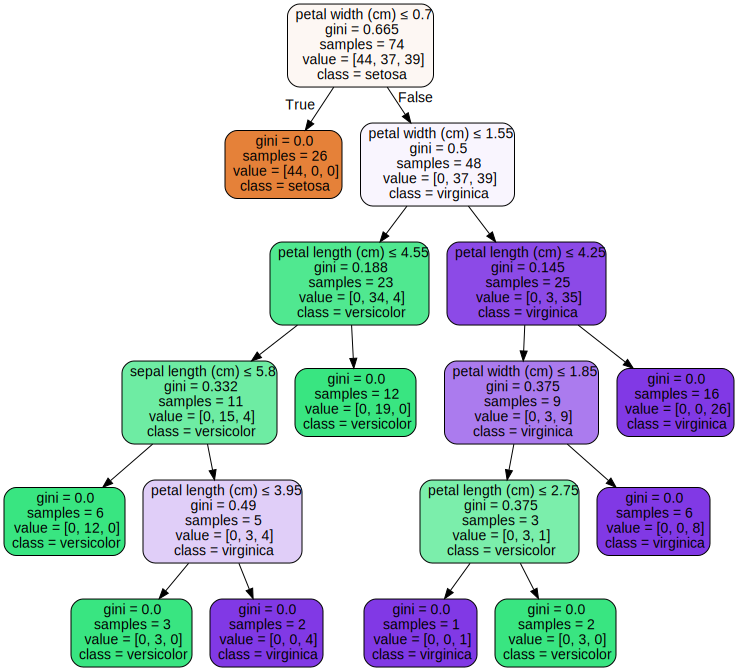

In [ ]:
dot_data = export_graphviz(
    model.estimators_[0], out_file=None, feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True, special_characters=True
)

# візуалізація дерева
graph = graphviz.Source(dot_data)
graph.render("iris_tree")
graph

# GreedSearch

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Розбиття даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення класифікатора Random Forest
model = RandomForestClassifier()

# Визначення сітки гіперпараметрів для перебору
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 4]
}

# Створення об'єкта GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Запуск пошуку найкращих гіперпараметрів
grid_search.fit(X_train, y_train)

Найкращі параметри: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Точність моделі з найкращими параметрами: 1.0


In [ ]:

# Вивід найкращих знайдених гіперпараметрів
print("Найкращі параметри:", grid_search.best_params_)

# Оцінка точності моделі з найкращими параметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі з найкращими параметрами: {accuracy}")

Найкращі параметри: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Точність моделі з найкращими параметрами: 1.0


In [ ]:
y_pred_train = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

1.0

In [ ]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі з найкращими параметрами: {accuracy}")

Точність моделі з найкращими параметрами: 1.0


# Work with trained model

In [ ]:
from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

svc_model = svm.SVC()
svc_model.fit(X, y)
svc_model.score(X, y)

0.9733333333333334

## Pickle

In [ ]:
import pickle

# save
with open('pickle_svc_model.pkl','wb') as f:
    pickle.dump(svc_model, f)

# load
with open('pickle_svc_model.pkl', 'rb') as f:
    clf_pickle_restored = pickle.load(f)

clf_pickle_restored.predict(X[0:1])

array([0])

In [ ]:
import pickle

# save
with open('pickle_model.pkl','wb') as f:
    pickle.dump(best_model, f)

# load
with open('pickle_model.pkl', 'rb') as f:
    clf_pickle_restored = pickle.load(f)

array([0])

In [ ]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
clf_pickle_restored.predict(X[:1])

array([0])

In [ ]:
type(clf_pickle_restored)

sklearn.ensemble._forest.RandomForestClassifier

## Joblib

In [ ]:
# !pip install joblib

In [ ]:
import joblib

# save
joblib.dump(best_model, "joblib_model.pkl", compress=3)

# load
clf_joblib_restored = joblib.load("joblib_model.pkl")

clf_joblib_restored.predict(X[0:1])

array([0])

In [ ]:
type(clf_joblib_restored)

sklearn.ensemble._forest.RandomForestClassifier

## Homework

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/idle-1.csv")

In [ ]:
df

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,1.000776,4.616021,8.576031
1,0.718261,4.209007,8.446744
2,-0.909797,-0.282516,9.203311
3,5.099650,0.148441,8.418014
4,1.762132,-0.162806,9.251195
5,-0.086191,-0.148441,9.787497
6,-0.062249,-0.191536,9.773131
7,-0.057461,-0.114922,9.763555
8,-0.124498,-0.162806,9.782708
9,-0.138864,-0.124498,9.768343


In [ ]:
df.accelerometer_X.min()

-0.909797

In [ ]:
df.accelerometer_X.idxmin()

2

In [ ]:
df.accelerometer_X.idxmax()

3

In [ ]:
df.accelerometer_X.max()

5.09965

In [ ]:
df.accelerometer_X.mean()

0.17844786666666668

In [ ]:
df.accelerometer_X.std()

1.0363608474565926

In [ ]:
df.accelerometer_X.var()

1.074043806140947

In [ ]:
# RMS
np.sqrt(np.mean(df.accelerometer_X**2))

1.0344496058552746

In [ ]:
data = {'x_min': [df.accelerometer_X.min()], 'x_max': [df.accelerometer_X.max()], 'target': ["idle"]}
pd.DataFrame.from_dict(data)

,x_min,x_max,target
0,-0.909797,5.09965,idle
